# [HW8] FBA QUANT - FINANCIAL ENGINEERING

Kim Na Young (dudskrla09@gmail.com)

---

### Problem 1. 


Suppose you are a portfolio manager and you are going to use derivatives to construct certain portfolio. The current stock price for AAPL is $171.01 per share, at 10 am, March 8, 2019. You want to sell 1 unit of European Call on AAPL, with strike of $180 and maturity of 1 year. Suppose the annualized interest rate is 3%, the annualized drift for AAPL is 5%, no dividend, and the annualized volatility is 10%. In order to hedge the potential risk of your option, you are going to calculate several Greeks based on Black-Merton-Scholes model.

(a) Calculate the Call option price, at 10 am, March 8, 2019.

(b) Calculate the Delta, Gamma, Vega, Theta at 10 am, March 8, 2019. Also, give your thoughts about why Delta is positive or negative.

(c) Suppose you are doing a monthly Delta-Hedge, that is, you re-hedge per month. After one month, at 10 am, April 8, 2019, the stock price is $180.2, and you want to re-hedge right now. Calculate the additional amount of shares of AAPL you should buy (positive for buying, negative for selling) at 10 am, April 8, 2019, in order to re-hedge. Also, give your thoughts about why you are selling or buying stocks when the stock price goes up from the meaning of Delta Hedging.

(d) Calculate the change of your portfolio value (i.e. the net cashflow). Note that your answer should be in $ with new portfolio value minus previous value, in present value at 10 am, April 8, 2019.

### Solution 1.

**(a) Calculate the Call option price, at 10 am, March 8, 2019.**
- S = $171.01
- K = $180
- r = 0.03 (= 3%)
- T = 1 (= 1 year)
- σ = 0.1 (= 10% per year)
- c = 0 (= no dividend)

$$ C = S e^{-cT}N(d_1) - Ke^{-rT}N(d_2) \;\; (\; N(d) = P(N(0,1) ≤ d) \; )$$

$$ (1) \;\; d_1 = \frac{log(\frac{S}{k}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}} = \frac{log(\frac{\$50}{\$50}) + (0.03-0+\frac{0.5^2}{2})*0.5}{0.5\sqrt{0.5}} $$

$$ (2) \;\; d_2 = d_1 - σ\sqrt{T} = d_1 - 0.5\sqrt{0.5} $$

In [4]:
import math
from scipy.stats import norm

# (0) Define variables
S = 171.01
K = 180
r = 0.03 
T = 1
sigma = 0.1
c = 0

# (1) d1
d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )

# (2) d2
d2 = d1 - sigma * math.sqrt(T)

# (3) N(d1)
def N(d):
    return norm.cdf(d, loc=0, scale=1)

N_d1 = N(d1)

# (4) N(d2)
N_d2 = N(d2)

# (5) C
C =  S * math.exp(-c * T) * N_d1 - K * math.exp(-r * T) * N_d2

print(f"d1 : {d1} | d2 : {d2}")
print(f"N(d1) : {N(d1)} | N(d2) : {N(d2)}")
print(f"The value of call option: ${C}")

d1 : -0.16234816565247978 | d2 : -0.26234816565247976
N(d1) : 0.43551584351776396 | N(d2) : 0.3965265155932418
The value of call option: $5.212234921590209


**(b) Calculate the Delta, Gamma, Vega, Theta at 10 am, March 8, 2019. Also, give your thoughts about why Delta is positive or negative.**

$$ Delta = \frac{∂C}{∂S} = e^{-cT}N(d_1) $$

$$ Gamma = \frac{∂^2C}{∂S^2} = e^{-cT}\frac{N'(d_1)}{σS\sqrt{T}} $$ 

$$ Vega = \frac{∂C}{∂σ} = e^{-cT}S\sqrt{T}N'(d_1) $$

$$ Theta = -\frac{∂C}{∂T} = -e^{-cT}SN'(d_1)\frac{σ}{2\sqrt{T}} + ce^{-cT}SN(d_1) - rKe^{-rT}N(d_2) $$

In [5]:
DELTA = math.exp(-c * T) * norm.cdf(d1)
GAMMA = math.exp(-c * T) * norm.pdf(d1) / (sigma * S * math.sqrt(T))
VEGA = math.exp(-c * T) * S * math.sqrt(T) * norm.pdf(d1) 
THETA = - (math.exp(-c * T) * S * norm.pdf(d1) * sigma / (2 * math.sqrt(T))) \
        + (c * math.exp(-c * T) * S * N(d1)) \
        - (r * K * math.exp(-r * T) * norm.cdf(d2))

print(f"DELTA = {DELTA}")
print(f"GAMMA = {GAMMA}")
print(f"VEGA = {VEGA}")
print(f"THETA = {THETA}")

DELTA = 0.43551584351776396
GAMMA = 0.023023175545034132
VEGA = 67.32994176750246
THETA = -5.4444569727266


Delta is positive 

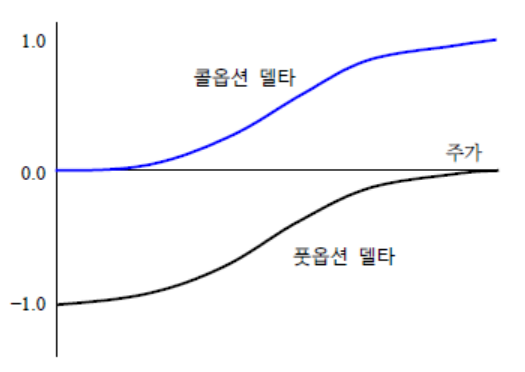

**(c) Suppose you are doing a monthly Delta-Hedge, that is, you re-hedge per month. After one month, at 10 am, April 8, 2019, the stock price is $180.2, and you want to re-hedge right now. Calculate the additional amount of shares of AAPL you should buy (positive for buying, negative for selling) at 10 am, April 8, 2019, in order to re-hedge. Also, give your thoughts about why you are selling or buying stocks when the stock price goes up from the meaning of Delta Hedging.**

In [13]:
S_OLD = 171.01
S_NEW = 180.2
K = 180
r = 0.03 
T = 1
sigma = 0.1
c = 0

def calculate_delta(S, K, r, c, sigma, T):
    d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )
    DELTA = math.exp(-c * T) * norm.cdf(d1)
    return DELTA

DELTA_OLD = calculate_delta(S_OLD, K, r, c, sigma, T)
DELTA_NEW = calculate_delta(S_NEW, K, r, c, sigma, T * (11/12))

print(f"DELTA_OLD = {DELTA_OLD}")
print(f"DELTA_NEW = {DELTA_NEW}")
print(f"The additional amount of buying : {DELTA_NEW - DELTA_OLD} units")

DELTA_OLD = 0.43551584351776396
DELTA_NEW = 0.6355909770318846
The additional amount of buying : 0.20007513351412065 units


(Q. thoughts?)
$$ Delta_{old} * Number \; of \; units_{old} = Number \; of \; stocks_{old} \; - \; (1) $$
$$ Delta_{new} * Number \; of \; units_{new} = Number \; of \; stocks_{new} \; - \; (2) $$
$$ ∴ Additional \; amount = (Delta_{new} * Number \; of \; units_{new}) - (Delta_{old} * Number \; of \; units_{old}) = (2) - (1)$$

**(d) Calculate the change of your portfolio value (i.e. the net cashflow). Note that your answer should be in $ with new portfolio value minus previous value, in present value at 10 am, April 8, 2019.**

$$ V_{i+1} = V_{i} + δ_i(S_{i+1} + S_icΔt - S_t) + (V_i - δ_iS_i)(e^{rΔt} - 1) $$
$$ ∴ V_{i+1} - V_{i} = δ_i(S_{i+1} + S_icΔt - S_t) + (V_i - δ_iS_i)(e^{rΔt} - 1) $$

In [15]:
change_of_portfolio_value = DELTA_OLD * (S_NEW + S_OLD * c * 1/12 - S_OLD) + (C - DELTA_OLD * S_OLD) * (math.exp(r * 1/12) - 1)
print(f"Change of portfolio value = ${change_of_portfolio_value}")

Change of portfolio value = $3.829010643586411


----


### Problem 2. 

Assume the same situation as Problem 1. Back to at 10 am, March 8, 2019. Suppose you are constructing another portfolio by buying a European Call on AAPL with strike 180 and selling the European Call on AAPL with strike 185.

(a) Without volatility skew, that is, volatility is always 10% for different strikes. Calculate your portfolio value V, at 10 am, March 8, 2019.

(b) Suppose the market actually has a volatility skew: $ σ(K) = min\{1, 18K−1\} $. Calculate your portfolio $ V' $ again, at 10 am, March 8, 2019. Also, give your thought about why the portfolio value goes higher or lower after we assume the volatility skew in the market.


### Solution 2.

**(a) Without volatility skew, that is, volatility is always 10% for different strikes. Calculate your portfolio value V, at 10 am, March 8, 2019.**

If Black-Scholes model were correct then should have a flat volatility surface and it would be constant through time
 → Using Black-Scholes model
 
- S = $171.01
- K_buy = $180
- K_sell = $185
- r = 0.03 (= 3%)
- T = 1 (= 1 year)
- σ = 0.1 (= 10% per year)
- c = 0 (= no dividend)


In [33]:
import math
from scipy.stats import norm

# (0) Define variables
S = 171.01
K_BUY = 180
K_SELL = 185
r = 0.03 
T = 1
sigma = 0.1
c = 0

def N(d):
    return norm.cdf(d, loc=0, scale=1)

def calculate_option_price(S, K, r, T, sigma, c):
    d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )
    d2 = d1 - sigma * math.sqrt(T)
    N_d1 = N(d1)
    N_d2 = N(d2)
    C =  S * math.exp(-c * T) * N_d1 - K * math.exp(-r * T) * N_d2
    return C

C_BUY = calculate_option_price(S, K_BUY, r, T, sigma, c)
C_SELL = calculate_option_price(S, K_SELL, r, T, sigma, c)
V = C_BUY - C_SELL

print(f"The value of call option (buy): ${C_BUY}")
print(f"The value of call option (sell): ${C_SELL}")
print(f"The value of portfolio: ${V}")

The value of call option (buy): $5.212234921590209
The value of call option (sell): $3.537978268195353
The value of portfolio: $1.6742566533948562


**(b) Suppose the market actually has a volatility skew: $ σ(K) = min\{1, 18K^{−1}\} $. Calculate your portfolio $ V' $ again, at 10 am, March 8, 2019. Also, give your thought about why the portfolio value goes higher or lower after we assume the volatility skew in the market.**

In [34]:
import math
from scipy.stats import norm

S = 171.01
K_BUY = 180
K_SELL = 185
r = 0.03 
T = 1
c = 0

def N(d):
    return norm.cdf(d, loc=0, scale=1)

def calculate_option_price(S, K, r, T, c):
    sigma = min(1, 18 * K**(-1))
    d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )
    d2 = d1 - sigma * math.sqrt(T)
    N_d1 = N(d1)
    N_d2 = N(d2)
    C =  S * math.exp(-c * T) * N_d1 - K * math.exp(-r * T) * N_d2
    return C

C_BUY = calculate_option_price(S, K_BUY, r, T, c)
C_SELL = calculate_option_price(S, K_SELL, r, T, c)
V_ = C_BUY - C_SELL

print(f"sigma (buy) = {min(1, 18 * K_BUY**(-1))}")
print(f"sigma (sell) = {min(1, 18 * K_SELL**(-1))}") # lower than original sigma (0.10)
print(f"The value of call option (buy): ${C_BUY}")
print(f"The value of call option (sell): ${C_SELL}")
print(f"The value of portfolio: ${V_}")

sigma (buy) = 0.1
sigma (sell) = 0.0972972972972973
The value of call option (buy): $5.212234921590209
The value of call option (sell): $3.370878571999434
The value of portfolio: $1.8413563495907752


---

### Problem 3.

Assume the same situation as Problem 1. Now you are focusing on portfolios with digital options on AAPL, at 10 am, March 8, 2019. All the information about the stock stays the same, and we are back to a world of constant volatility 10% 
again.

(a) Note that the payoff of this option at maturity is: $ 1_{S_T ≥ K}$  Calculate the price of digital call option on AAPL with strike 180 and maturity of 1 year, at 10 am, March 8, 2019. Also, give your thoughts about the proper 
range for the digital option's price, from the Put-Call Parity. And compare this number with the Delta of European Call in Problem 1.

(b) Suppose you are going to sell this digital option at the price you calculated at (a). Meantime, you want to do Delta-Hedging to lowered potential risk. Calculate the amount of shares of AAPL you should buy or sell (positive for buying, negative for selling), based on Black-Scholes model, at 10 am, March 8, 2019. Again, compare this number with the Gamma of European Call in Problem 1.

(c) Suppose you are constructing another portfolio by buying a digital European Call on AAPL with strike 180 and selling a digital European Call on AAPL with strike 185. Calculate your portfolio value W, at 10 am, March 8, 2019.

(d) Now we assume the market has a volatility skew: $ σ(K) = min\{1, 18K^{−1}\} $. Note that here we should use the pricing formula based on chain rule:
$$ C_{Digital}(K) = - \frac{dC(K, σ(K))}{dK} = - \frac{∂C(K, σ(K))}{∂K} - \frac{∂C(K, σ(K))}{∂σ} * \frac{∂σ(K)}{∂K} $$
Calculate your portfolio $ W' $ again, at 10 am, March 8, 2019. And compare the difference of portfolio value $ W' - W $ with the previous one $ V' - V $ in Problem 2. Also, give your thoughts about the impact of volatility skew on different portfolios.


### Solution 3.

**(a) Note that the payoff of this option at maturity is: $ 1_{S_T ≥ K}$  Calculate the price of digital call option on AAPL with strike 180 and maturity of 1 year, at 10 am, March 8, 2019. Also, give your thoughts about the proper 
range for the digital option's price, from the Put-Call Parity. And compare this number with the Delta of European Call in Problem 1.**

- S = $171.01
- K = $180
- r = 0.03 (= 3%)
- T = 1 (= 1 year)
- σ = 0.1 (= 10% per year)
- c = 0 (= no dividend)

$$ C_{Digital} = e^{−rT}N(d_2) $$

In [22]:
import math
from scipy.stats import norm

S = 171.01
K = 180
r = 0.03 
T = 1
sigma = 0.1
c = 0

def N(d):
    return norm.cdf(d, loc=0, scale=1)

def calculate_digital_option_price(S, K, r, T, sigma, c):
    d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )
    d2 = d1 - sigma * math.sqrt(T)
    N_d2 = N(d2)
    C =  math.exp(-r * T) * N_d2
    return C

print(f"The value of digital option: ${calculate_digital_option_price(S, K, r, T, sigma, c)}")

The value of digital option: $0.3848073859910144


Q. give your thoughts about the proper range for the digital option's price, from the Put-Call Parity.

Q. compare this number with the Delta of European Call in Problem 1.

**(b) Suppose you are going to sell this digital option at the price you calculated at (a). Meantime, you want to do Delta-Hedging to lowered potential risk. Calculate the amount of shares of AAPL you should buy or sell (positive for buying, negative for selling), based on Black-Scholes model, at 10 am, March 8, 2019. Again, compare this number with the Gamma of European Call in Problem 1.**

$$ Delta_{Digital} = \frac{∂C_{Digital}}{∂S} = \frac{∂(e^{−rT}N(d_2))}{∂S} = e^{−rT}N'(d_2)\frac{∂d_2}{∂S} $$
$$ \;\; (1) \;\; d_1 = \frac{log(\frac{S}{K}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}} ≒ \frac{ln(\frac{S}{K}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}} $$
$$ \;\; (2) \;\; d_2 = d_1 - σ\sqrt{T} $$
$$ \frac{∂d_2}{∂S} = \frac{∂(d_1 - σ\sqrt{T})}{∂S} = \frac{∂d_1}{∂S} = \frac{∂(\frac{ln(\frac{S}{k}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}})}{∂S} = \frac{\frac{1}{S}}{σ\sqrt{T}} $$
$$ ∴ Delta_{Digital} = e^{−rT}N'(d_2)\frac{∂d_2}{∂S} = e^{−rT}N'(d_2)\frac{\frac{1}{S}}{σ\sqrt{T}} $$

In [ ]:
DELTA_DIGITAL = math.exp(-r * T) * norm.pdf(d2) * (1/S) / (sigma * math.sqrt(T)) 
print(f"DELTA of DIGITAL = {DELTA_DIGITAL}")
print(f"GAMMA of Problem 1 = {GAMMA}")

DELTA of DIGITAL = 0.02250203999713551
GAMMA of Problem 1 = 0.023023175545034132


**(c) Suppose you are constructing another portfolio by buying a digital European Call on AAPL with strike 180 and selling a digital European Call on AAPL with strike 185. Calculate your portfolio value W, at 10 am, March 8, 2019.**

In [27]:
import math
from scipy.stats import norm

S = 171.01
K_BUY = 180
K_SELL = 185
r = 0.03 
T = 1
sigma = 0.1
c = 0

def N(d):
    return norm.cdf(d, loc=0, scale=1)

def calculate_digital_option_price(S, K, r, T, sigma, c):
    d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )
    d2 = d1 - sigma * math.sqrt(T)
    N_d2 = N(d2)
    C =  math.exp(-r * T) * N_d2
    return C

C_DIGITAL_BUY = calculate_digital_option_price(S, K_BUY, r, T, sigma, c)
C_DIGITAL_SELL = calculate_digital_option_price(S, K_SELL, r, T, sigma, c)
W = C_DIGITAL_BUY - C_DIGITAL_SELL

print(f"The value of digital option (buy): ${C_DIGITAL_BUY}")
print(f"The value of digital option (sell): ${C_DIGITAL_SELL}")
print(f"The value of portfolio: ${W}")

The value of digital option (buy): $0.3848073859910144
The value of digital option (sell): $0.2871184593181568
The value of portfolio: $0.09768892667285756


**(d) Now we assume the market has a volatility skew: $ σ(K) = min\{1, 18K^{−1}\} $. Note that here we should use the pricing formula based on chain rule:**
$$ C_{Digital}(K) = - \frac{dC(K, σ(K))}{dK} = - \frac{∂C(K, σ(K))}{∂K} - \frac{∂C(K, σ(K))}{∂σ} * \frac{∂σ(K)}{∂K} $$
**Calculate your portfolio $ W' $ again, at 10 am, March 8, 2019. And compare the difference of portfolio value $ W' - W $ with the previous one $ V' - V $ in Problem 2. Also, give your thoughts about the impact of volatility skew on different portfolios.**

$$ (First.) \;\; - \frac{∂C(K, σ(K))}{∂K} = -\frac{∂C_{Digital}}{∂K} = -\frac{∂(e^{−rT}N(d_2))}{∂K} = -e^{−rT}N'(d_2)\frac{∂d_2}{∂K} $$
$$ \;\; (1) \;\; d_1 = \frac{log(\frac{S}{K}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}} ≒ \frac{ln(\frac{S}{K}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}} $$
$$ \;\; (2) \;\; d_2 = d_1 - σ\sqrt{T} $$
$$ \frac{∂d_2}{∂K} = \frac{∂(d_1 - σ\sqrt{T})}{∂K} = \frac{∂d_1}{∂K} = \frac{∂(\frac{ln(\frac{S}{K}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}})}{∂K} = -\frac{\frac{1}{K}}{σ\sqrt{T}} $$
$$ ∴ - \frac{∂C(K, σ(K))}{∂K}  = -e^{−rT}N'(d_2)\frac{∂d_2}{∂K} = -e^{−rT}N'(d_2)\frac{-\frac{1}{K}}{σ\sqrt{T}} = e^{−rT}N'(d_2)\frac{\frac{1}{K}}{σ\sqrt{T}} $$

<br> 

$$ (Second.) \;\; - \frac{∂C(K, σ(K))}{∂σ} = -\frac{∂C_{Digital}}{∂σ} = -\frac{∂(e^{−rT}N(d_2))}{∂σ} = -e^{−rT}N'(d_2)\frac{∂d_2}{∂σ} $$
$$ \frac{∂d_2}{∂σ} = \frac{∂(d_1 - σ\sqrt{T})}{∂σ} = \frac{∂d_1}{∂σ} - \sqrt{T} = \frac{∂(\frac{ln(\frac{S}{K}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}})}{∂σ} - \sqrt{T} = \frac{\sqrt{T}}{2} - \sqrt{T} = -\frac{\sqrt{T}}{2} $$
$$ ∴ - \frac{∂C(K, σ(K))}{∂σ}  = -e^{−rT}N'(d_2)\frac{∂d_2}{∂σ} = -e^{−rT}N'(d_2)(-\frac{\sqrt{T}}{2}) = e^{−rT}N'(d_2)\frac{\sqrt{T}}{2} $$

<br>

$$ (Third.) \;\; \frac{∂σ(K)}{∂K} = \frac{∂(min(1, 18K^{-1}))}{∂K} = \frac{∂(18K^{-1})}{∂K} = -18K^{-2} $$

In [2]:
import math
from scipy.stats import norm

S = 171.01
K_BUY = 180
K_SELL = 185
r = 0.03 
T = 1
sigma = 0.1
c = 0

In [3]:
# Check min(1, 18*K**(-1))
print(f"1 > {18 * K_BUY ** (-1)}")
print(f"1 > {18 * K_SELL ** (-1)}")

def calculate_digital_option_votality_skew(S, K, r, T, sigma, c):
    FIRST = math.exp(-r * T) * norm.pdf(d2) * (1/K) / (sigma * math.sqrt(T)) 
    SECOND = math.exp(-r * T) * norm.pdf(d2) * math.sqrt(T) / 2
    THIRD = - 18 * K ** (-2)
    return FIRST + SECOND * THIRD

C_DIGITAL_BUY_SKEW = calculate_digital_option_votality_skew(S, K_BUY, r, T, sigma, c)
C_DIGITAL_SELL_SKEW = calculate_digital_option_votality_skew(S, K_SELL, r, T, sigma, c)
W_ = C_DIGITAL_BUY_SKEW - C_DIGITAL_SELL_SKEW

print(f"The value of digital option (buy): ${C_DIGITAL_BUY_SKEW}") # 0.16 
print(f"The value of digital option (sell): ${C_DIGITAL_SELL_SKEW}") # 0.0047
print(f"The value of portfolio: ${W_}")

1 > 0.1
1 > 0.0972972972972973


NameError: name 'd2' is not defined

In [37]:
print(f"W' - W = {W_ - W}")
print(f"V' - V = {V_ - V}")

W' - W = -0.097116837614105
V' - V = 0.16709969619591902
